### Classification with Decision Tree and Random Forest

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFECV
import sklearn.metrics as sm
pd.set_option('display.max_columns', None)

C:\Users\xange\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\xange\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\xange\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\xange\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [152]:
df=pd.read_csv('X_train.csv')
df.head()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,official_video,ifTop100,trackLength,albumLength,ArtistEqualsChannel,album_tracks,available_markets,album_release_days,Album_type_album,Album_type_compilation,Album_type_single,target
0,0.407,0.358,9.0,-12.908,0.0343,0.829,0.424000,0.0827,0.267,92.292,284800.0,29700954.0,121515.0,4260.0,0.0,0.0,0,11,7,0,9,184,19183,1,0,0,78507272.0
1,0.463,0.325,11.0,-14.762,0.0301,0.197,0.000000,0.0641,0.386,135.728,283133.0,1159190.0,3822.0,84.0,0.0,0.0,0,22,12,0,10,2,11778,1,0,0,134634501.0
2,0.253,0.189,8.0,-17.741,0.0348,0.856,0.000004,0.1120,0.143,133.591,152000.0,3309.0,31.0,3.0,0.0,0.0,1,55,33,0,12,25,22005,1,0,0,18549494.0
3,0.828,0.539,1.0,-7.300,0.2250,0.205,0.000038,0.3050,0.680,125.050,189171.0,460685.0,19970.0,817.0,0.0,1.0,0,12,12,1,1,183,64,0,0,1,1146962.0
4,0.395,0.288,11.0,-10.465,0.0345,0.656,0.000000,0.1160,0.189,130.571,238640.0,1870346.0,22327.0,1097.0,1.0,1.0,0,47,20,0,15,184,694,1,0,0,70267624.0


In [153]:
df.shape

(14560, 27)

In [154]:
Y=df['target'].values
X=df.drop(['target'],axis=1)

In [155]:
X.head()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,official_video,ifTop100,trackLength,albumLength,ArtistEqualsChannel,album_tracks,available_markets,album_release_days,Album_type_album,Album_type_compilation,Album_type_single
0,0.407,0.358,9.0,-12.908,0.0343,0.829,0.424000,0.0827,0.267,92.292,284800.0,29700954.0,121515.0,4260.0,0.0,0.0,0,11,7,0,9,184,19183,1,0,0
1,0.463,0.325,11.0,-14.762,0.0301,0.197,0.000000,0.0641,0.386,135.728,283133.0,1159190.0,3822.0,84.0,0.0,0.0,0,22,12,0,10,2,11778,1,0,0
2,0.253,0.189,8.0,-17.741,0.0348,0.856,0.000004,0.1120,0.143,133.591,152000.0,3309.0,31.0,3.0,0.0,0.0,1,55,33,0,12,25,22005,1,0,0
3,0.828,0.539,1.0,-7.300,0.2250,0.205,0.000038,0.3050,0.680,125.050,189171.0,460685.0,19970.0,817.0,0.0,1.0,0,12,12,1,1,183,64,0,0,1
4,0.395,0.288,11.0,-10.465,0.0345,0.656,0.000000,0.1160,0.189,130.571,238640.0,1870346.0,22327.0,1097.0,1.0,1.0,0,47,20,0,15,184,694,1,0,0


## Applying transformations with Boxcox

In [156]:
from scipy import stats
def boxcoxTransformation(data,column):
    # transform training data & save lambda value
    fitted_data, fitted_lambda = stats.boxcox(data)
    
    binwidth=1
    
    # Set up the plot
    ax = plt.subplot(1, 2, 1)
    
    # Draw the plot
    ax.hist(data, bins = int(180/binwidth),
             color = 'blue', edgecolor = 'black')
    ax.set_title('Before transformation', size = 10)
    ax.set_ylabel('Y', size = 10)
    ax.set_xlabel(column, size= 10)
    
    ax = plt.subplot(1, 2, 2)
    ax.hist(fitted_data, bins = int(180/binwidth),
         color = 'blue', edgecolor = 'green')
    # Title and labels
    ax.set_title('After transformation', size = 10)
    ax.set_ylabel('Y', size = 10)
    ax.set_xlabel(column, size= 10)

    plt.tight_layout()
    plt.show()

    print(f"Lambda value used for Transformation: {fitted_lambda}")
    return fitted_data, fitted_lambda

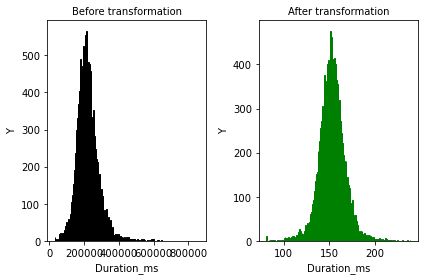

Lambda value used for Transformation: 0.31773060804228004


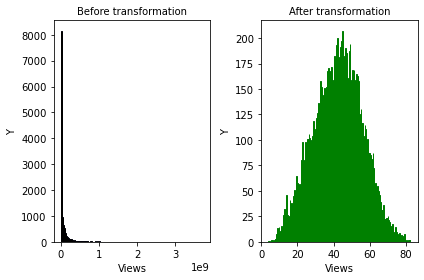

Lambda value used for Transformation: 0.10156045550436


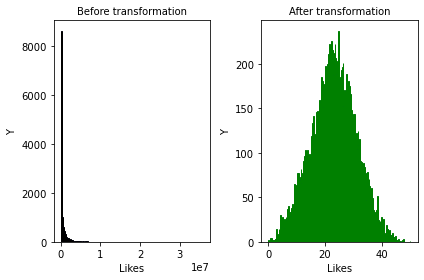

Lambda value used for Transformation: 0.10579677750625552


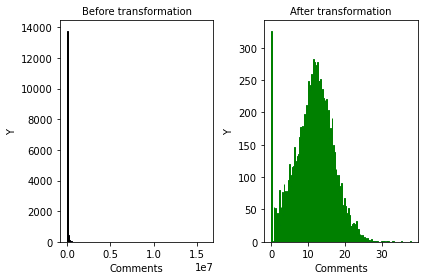

Lambda value used for Transformation: 0.08847159950775114


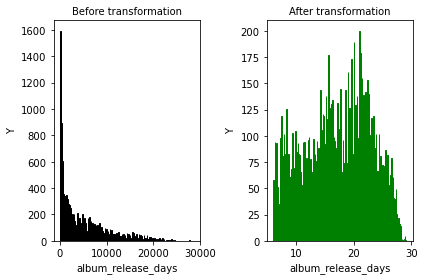

Lambda value used for Transformation: 0.1770091103885189


In [157]:
columns_box=['Duration_ms','Views','Likes','Comments','album_release_days']
transformed_columns=[]
for col in columns_box:
    fitted_data, fitted_lambda=boxcoxTransformation(X[col]+1,col)
    X[col]=fitted_data
fitted_data, fitted_lambda=boxcoxTransformation(Y+1,'Stream')
Y=fitted_data

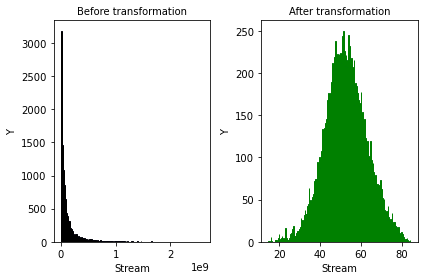

Lambda value used for Transformation: 0.10579595162230807


###  Auxiliar functions

In [160]:
def getBestFeatures(X_train,y_train,cv,scoring,clf):
    min_features_to_select = 5  # Minimum number of features to consider
#     clf =  DecisionTreeRegressor(random_state=0)
    rfecv = RFECV(
        estimator=clf,
        step=1,
        cv=cv,
        scoring=scoring,
        min_features_to_select=min_features_to_select,
        n_jobs=2,
    )
    rfecv.fit(X_train, y_train)
    mask = rfecv.get_support()
    return mask

In [161]:
from sklearn.metrics import accuracy_score
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    print(predictions)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
#     accuracy=accuracy_score(test_labels,predictions)
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

### Split the data into k-folds

In [162]:
k=10
# Create indices for k-fold cross-validation
indices = np.arange(len(X))
np.random.shuffle(indices)

# Split the data into k folds
folds = np.array_split(indices, k)

### Decision Tree Classification

In [84]:
minimum = df['target'].min()
maximum = df['target'].max()

intervals = np.linspace(minimum, maximum, num=4)

# Extracting the intervals
interval_1 = (round(intervals[0],2), round(intervals[1],2))
interval_2 = (round(intervals[1],2), round(intervals[2],2))
interval_3 = (round(intervals[2],2), round(intervals[3],2))

print("Interval 1:", interval_1)
print("Interval 2:", interval_2)
print("Interval 3:", interval_3)


Interval 1: (6574.0, 864979922.33)
Interval 2: (864979922.33, 1729953270.67)
Interval 3: (1729953270.67, 2594926619.0)


In [137]:
df['target_cat'] = pd.cut(x=df['target'], bins=[intervals[0]-1, 1e8, 1e9, intervals[3]],
                     labels=[0, 1, 2])

# df_test['target_cat'] = pd.cut(x=df_test['target'], bins=[intervals[0]-1, 1e8, 1e9, intervals[3]],
#                      labels=[0, 1, 2])
# df['target_cat'] = pd.cut(x=df['target'], bins=[intervals[0]-1, intervals[1], intervals[2], intervals[3]],
#                      labels=[0, 1, 2])

# df['target_cat'] = pd.cut(x=df['target'], bins=[0, 100000000,intervals[3]],
#                      labels=[0, 1])

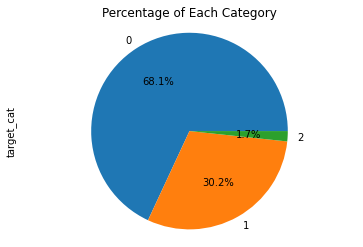

In [141]:
# Calculate value counts and percentages
category_counts = df['target_cat'].value_counts()
category_percentages = (category_counts / len(df)) * 100

# Plotting the pie chart
category_percentages.plot(kind='pie', autopct='%1.1f%%')

# Set the aspect ratio to 'equal' for a circular pie chart
plt.axis('equal')

# Set the title
plt.title('Percentage of Each Category')

# Display the chart
plt.show()

In [88]:
Y=df['target_cat']

In [100]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import sklearn.metrics as sm
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


In [101]:
f1s=[]
accs=[]
presicions=[]
recalls=[]
model =  DecisionTreeClassifier()

# Perform cross-validation
for i in range(k):
    # Split the data into train and test sets
    test_indices = folds[i]
    train_indices = np.concatenate([folds[j] for j in range(k) if j != i])
    
    X_train, y_train = X.loc[train_indices], Y[train_indices]
    X_test, y_test = X.loc[test_indices], Y[test_indices]
    
    mask=getBestFeatures(X_train,y_train,3,'accuracy',model)
    X_train=X_train.iloc[:,mask]
    X_test=X_test.iloc[:,mask]
    
    # Fit the model and make predictions
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate the model and store the score
    # Model Accuracy, how often is the classifier correct?
    accuracy=metrics.accuracy_score(y_test, y_test_pred)
    print("Accuracy:",accuracy)
    f1_w=f1_score(y_test, y_test_pred, average='weighted')
    precision=precision_score(y_test, y_test_pred,average='weighted')
    recall=recall_score(y_test, y_test_pred,average='weighted')
    f1s.append(f1_w)
    accs.append(accuracy)
    presicions.append(precision)
    recalls.append(recall)
    

Accuracy: 0.7245879120879121


In [102]:
print("Accuracy: "+str(accs)+" "+ "Mean:"+str(np.mean(accs)))
print("F1 weighted: "+str(f1s)+" "+ "Mean:"+str(np.mean(f1s)))
print("Precision: "+str(presicions)+" "+ "Mean:"+str(np.mean(presicions)))
print("Recall: "+str(recalls)+" "+ "Mean:"+str(np.mean(recalls)))



Accuracy: [0.7245879120879121] Mean:0.7245879120879121
F1 weighted: [0.7275005921657208] Mean:0.7275005921657208
Precision: [0.7314206765131243] Mean:0.7314206765131243
Recall: [0.7245879120879121] Mean:0.7245879120879121


### Random Forest Classification

In [98]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
f1s=[]
accs=[]
presicions=[]
recalls=[]
model = RandomForestClassifier()

# Perform cross-validation
for i in range(k):
    # Split the data into train and test sets
    test_indices = folds[i]
    train_indices = np.concatenate([folds[j] for j in range(k) if j != i])
    
    X_train, y_train = X.loc[train_indices], Y[train_indices]
    X_test, y_test = X.loc[test_indices], Y[test_indices]
    
    mask=getBestFeatures(X_train,y_train,3,'accuracy',model)
    X_train=X_train.iloc[:,mask]
    X_test=X_test.iloc[:,mask]
    
    # Fit the model and make predictions
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate the model and store the score
    # Model Accuracy, how often is the classifier correct?
    accuracy=metrics.accuracy_score(y_test, y_test_pred)
    print("Accuracy:",accuracy)
    f1_w=f1_score(y_test, y_test_pred, average='weighted')
    precision=precision_score(y_test, y_test_pred,average='weighted')
    recall=recall_score(y_test, y_test_pred,average='weighted')
    f1s.append(f1_w)
    accs.append(accuracy)
    presicions.append(precision)
    recalls.append(recall)

Accuracy: 0.8255494505494505


In [104]:
print("Accuracy: "+str(accs)+" "+ "Mean:"+str(np.mean(accs)))
print("F1 weighted: "+str(f1s)+" "+ "Mean:"+str(np.mean(f1s)))
print("Precision: "+str(presicions)+" "+ "Mean:"+str(np.mean(presicions)))
print("Recall: "+str(recalls)+" "+ "Mean:"+str(np.mean(recalls)))


Accuracy: [0.8255494505494505] Mean:0.8255494505494505
F1 weighted: [0.8175946871421097] Mean:0.8175946871421097
Precision: [0.8196086433801583] Mean:0.8196086433801583
Recall: [0.8255494505494505] Mean:0.8255494505494505


In [97]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_scores(df):
    VIF_Scores = pd.DataFrame()
    VIF_Scores["Independent Features"] = df.columns
    VIF_Scores["VIF Scores"] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return VIF_Scores
df1 = df.iloc[:,:-1]
vif_scores(df1)

,Independent Features,VIF Scores
0,Danceability,1.715692
1,Energy,3.422751
2,Key,1.004777
3,Loudness,3.435256
4,Speechiness,1.151457
5,Acousticness,1.934139
6,Instrumentalness,1.577785
7,Liveness,1.082157
8,Valence,1.667170
9,Tempo,1.070062


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c6bca811-fc7a-456b-b8f3-4c66c733d95a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>